## importing the necessary libraries

In [20]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## load the boston housing dataset

In [ ]:
boston = load_boston()

## convert the dataset into a Pandas data frame

In [4]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## target of the dataframe

In [8]:
df['MEDV'] = boston.target

#check the first five rows of your dataset
df.head()   

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## getting to know the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## check for the null values

In [12]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### There is no null values in this dataset, so there is no need to handle missing values

## shape of the dataset

In [14]:
df.shape

(506, 14)

## scaling of the dataset

We separate out the features and the labels(target) from the dataframe

In [17]:
df_features = df.drop('MEDV',axis=1)

df_label = df['MEDV']

df_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
#instantization of the StandardScaler()
scaler = StandardScaler()

# standardization 
scaled_df = scaler.fit_transform(df_features) 
print(scaled_df[:5])

[[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 -0.27259857 -0.74026221  0.19427445
   0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 -0.27259857 -0.74026221  1.28271368
  -0.26581176  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.39642699
  -1.2087274 ]
 [-0.41675042 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.01630251
  -0.80988851  1.07773662 -0.75292215 -1.10611514  0.1130321   0.41616284
  -1.36151682]
 [-0.41248185 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.22857665
  -0.51117971  1.07773662 -0.75292215 -1.10611514  0.1130321   0.44105193
  -1.02650148]]


# 2. PCA (Principal Component Analysis)

* ## Covariance Matrix

In [29]:
def cov(data):
    length = df_features.shape[0]
    covmat = (data.T.dot(data))/length
    return covmat

In [30]:
covarient_matrix = cov(scaled_df)

In [32]:
covarient_matrix = np.round(covarient_matrix, 3)
covarient_matrix

array([[ 1.   , -0.2  ,  0.407, -0.056,  0.421, -0.219,  0.353, -0.38 ,
         0.626,  0.583,  0.29 , -0.385,  0.456],
       [-0.2  ,  1.   , -0.534, -0.043, -0.517,  0.312, -0.57 ,  0.664,
        -0.312, -0.315, -0.392,  0.176, -0.413],
       [ 0.407, -0.534,  1.   ,  0.063,  0.764, -0.392,  0.645, -0.708,
         0.595,  0.721,  0.383, -0.357,  0.604],
       [-0.056, -0.043,  0.063,  1.   ,  0.091,  0.091,  0.087, -0.099,
        -0.007, -0.036, -0.122,  0.049, -0.054],
       [ 0.421, -0.517,  0.764,  0.091,  1.   , -0.302,  0.731, -0.769,
         0.611,  0.668,  0.189, -0.38 ,  0.591],
       [-0.219,  0.312, -0.392,  0.091, -0.302,  1.   , -0.24 ,  0.205,
        -0.21 , -0.292, -0.356,  0.128, -0.614],
       [ 0.353, -0.57 ,  0.645,  0.087,  0.731, -0.24 ,  1.   , -0.748,
         0.456,  0.506,  0.262, -0.274,  0.602],
       [-0.38 ,  0.664, -0.708, -0.099, -0.769,  0.205, -0.748,  1.   ,
        -0.495, -0.534, -0.232,  0.292, -0.497],
       [ 0.626, -0.312,  0.595, 

* ## Eigenvalues and Eigenvectors

In [33]:
eigenvalues, eigenvectors = np.linalg.eig(covarient_matrix)

In [34]:
len(eigenvectors)

13

* ## Sorting Eigenvalues and Eigenvectors in Ascending Order

In [37]:
indexs = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[indexs]
eigenvectors = eigenvectors[:, indexs]
sorted_eig_pairs = [(np.round(np.abs(eigenvalues[i]),3),
                             eigenvectors[:,i]) for i in range(len(eigenvalues))]
print('\n Sorted Eigen-Pair(descending order)')

sorted_eigenValues = []
for i in range(0, len(sorted_eig_pairs)):
    print('eigenvec_{0} : {1}'.format(str(i+1), str(sorted_eig_pairs[i][0])))
    sorted_eigenValues.append(sorted_eig_pairs[i][0])
print('\n Total Variance (sum of all eigenvalues) :', round(sum(sorted_eigenValues), 0))


 Sorted Eigen-Pair(descending order)
eigenvec_1 : 6.127
eigenvec_2 : 1.434
eigenvec_3 : 1.243
eigenvec_4 : 0.858
eigenvec_5 : 0.835
eigenvec_6 : 0.657
eigenvec_7 : 0.535
eigenvec_8 : 0.396
eigenvec_9 : 0.277
eigenvec_10 : 0.22
eigenvec_11 : 0.186
eigenvec_12 : 0.17
eigenvec_13 : 0.064

 Total Variance (sum of all eigenvalues) : 13.0


* ## Kasier Stoping Rule (Optimal Number of Eigenvectors)

In [44]:
best_eig_pairs = [sorted_eig_pairs[i][0] for i in range(0, len(sorted_eig_pairs)) if sorted_eig_pairs[i][0] >=1]
print("\nAccording to Kaiser's Stopping Rule :")
print("Number of PCs to be considered for PCA is : {}".format(str(len(best_eig_pairs))))
print("Their Eigenvalues are : {}".format(str(best_eig_pairs)))


According to Kaiser's Stopping Rule :
Number of PCs to be considered for PCA is : 3
Their Eigenvalues are : [6.127, 1.434, 1.243]


* ## Projection Matrix

In [46]:
K = 3
projection_matrix = np.array([list(np.hstack(i[1].reshape(13,1))) for i in sorted_eig_pairs[:]])
projection_matrix = projection_matrix[:K]
print("\n Projection-Matrix Dimension ...", projection_matrix.shape)



 Projection-Matrix Dimension ... (3, 13)


* ## Projection Matrix as a DataFrame

In [48]:
projection_matrix_df = pd.DataFrame(projection_matrix)
projection_matrix_df.columns = [str(i+1) for i in range(0, len(eigenvectors))]
projection_matrix_df = projection_matrix_df.set_index([pd.Index(["PC"+str(i+1) for i in range(0,3)])])
projection_matrix_df.shape

(3, 13)

* ## Transforming the scaled Data

In [49]:
pca_df = pd.DataFrame((scaled_df).dot(projection_matrix.T))
pca_df.columns = ['PC'+str(i+1) for i in range(0, K)]
pca_df.shape

(506, 3)

* ## Explained Variance Ratio

In [53]:
explain_var = []
for i in range(K):
    explain_var.append((eigenvalues[i])/np.sum(eigenvalues))
print(explain_var)
exp_var_ratio = sum(explain_var)


[0.47133242769373673, 0.11027026383021919, 0.0955950674492598]


In [55]:
print(f'We were able to preserve,{exp_var_ratio*100:.0f} %of the information from the original data')

We were able to preserve,68 %of the information from the original data


In [59]:
pca_df

,PC1,PC2,PC3
0,2.098392,-0.773534,-0.342918
1,1.457199,-0.590802,0.695632
2,2.074525,-0.599952,-0.166628
3,2.611414,0.007009,0.100295
4,2.458096,-0.097595,0.075394
...,...,...,...
501,0.314957,-0.722311,0.862257
502,0.110524,-0.756634,1.257458
503,0.312379,-1.154099,0.410569
504,0.270531,-1.039956,0.587300


# 3. Regression Model

In [69]:
X = pca_df
y = df_label.values.reshape(-1,1)

print(f'X.shape : {X.shape}')
print(f'y.shape : {y.shape}')

X.shape : (506, 3)
y.shape : (506, 1)


* ## Splitting the data into training and test data

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

* ## Training the model on the training dataset

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

* ## Testing the model on the test dataset

In [74]:
y_predicted = model.predict(X_test)

In [93]:
y_predicted

array([[19.59344173],
       [26.67229462],
       [21.33782008],
       [20.60698173],
       [31.65909127],
       [28.28718503],
       [14.88324783],
       [37.75237621],
       [19.32028234],
       [11.71691832],
       [17.31931637],
       [21.19728117],
       [23.56783185],
       [28.08572413],
       [21.26465324],
       [26.5538736 ],
       [19.58973206],
       [21.52767622],
       [21.68062458],
       [49.36293914],
       [20.13185159],
       [20.75360303],
       [15.79211194],
       [21.61360235],
       [26.82146927],
       [23.63276631],
       [40.39424836],
       [18.15950444],
       [20.46727503],
       [16.83976177],
       [21.62217307],
       [24.00053391],
       [15.4970849 ],
       [34.88422764],
       [20.54744605],
       [23.71358442],
       [21.86872969],
       [16.3976835 ],
       [18.74293411],
       [27.44885106],
       [23.50177989],
       [34.57516537],
       [25.86755924],
       [15.93010911],
       [20.13768775],
       [23

In [94]:
y_test

array([[19.8],
       [13.4],
       [17.8],
       [16.6],
       [39.8],
       [36.2],
       [14.4],
       [32.4],
       [21.4],
       [12.3],
       [17.8],
       [21.1],
       [28.1],
       [25. ],
       [21. ],
       [21.7],
       [18.2],
       [21. ],
       [21.1],
       [50. ],
       [11.9],
       [15.4],
       [11.8],
       [20.4],
       [28. ],
       [24.5],
       [48.8],
       [19.6],
       [20.4],
       [13.8],
       [20.9],
       [23.8],
       [13.5],
       [29. ],
       [18.4],
       [21.6],
       [20.6],
       [19.1],
       [14.5],
       [16.5],
       [21.4],
       [31.6],
       [24.4],
       [13.1],
       [16. ],
       [18.9],
       [21.7],
       [22. ],
       [23.1],
       [20.5],
       [31. ],
       [11.7],
       [12.7],
       [34.9],
       [17. ],
       [10.2],
       [33.1],
       [23.7],
       [13.4],
       [17.2],
       [24.4],
       [43.1],
       [20.8],
       [18.7],
       [23.3],
       [30.1],
       [21

# 4. Interpret the results from your model

In [86]:
from sklearn.metrics import r2_score

print(f'Explained variance score (R^2) : {(np.round(r2_score(y_true = y_test, y_pred = y_predicted),2)*100)}%')
print('Residual sum of squares is : '+ str(np.sum(np.square(y_predicted.flatten() - y_test.flatten()))))

Explained variance score (R^2) : 51.0%
Residual sum of squares is : 3708.8895260048553


* ## Printing the model's coefficient

In [96]:
coeff_df = pd.DataFrame(model.coef_, columns= X.columns)
coeff_df

,PC1,PC2,PC3
0,2.299756,-2.318406,-3.542597


* ## Mean Absolute Error (MAE), Mean Squared Error (MSE), and the Root Mean Squared Error (RMSE)

In [79]:
from sklearn import metrics

print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(y_test, y_predicted))

Mean Absolute Error (MAE):  4.114343626318208
Mean Squared Error (MSE):  36.36166201965544
Root Mean Squared Error (RMSE):  36.36166201965544


* ## Plotting the y_predicted and y_test

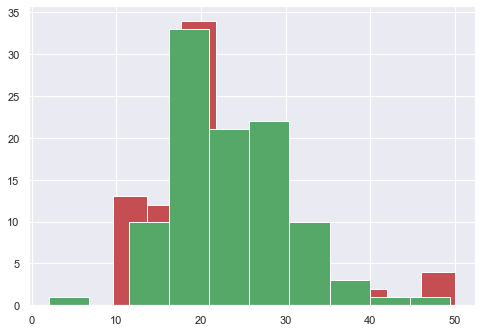

In [92]:

plt.rcParams["figure.figsize"] = (8,5.5)

y_test_flatten = y_test.flatten()
y_predicted_flatten = y_predicted.flatten()

plt.hist(y_test_flatten, bins=10, color='r');
plt.hist(y_predicted_flatten, bins=10, color='g');

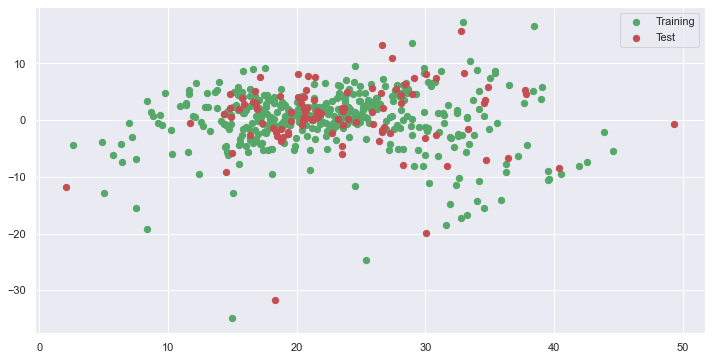

In [102]:
plt.figure(figsize=(12,6))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c ='g', s=40, label='Training')
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c ='r', s=40, label='Test')
plt.legend()

* ## Improving the Model's Performance

In [111]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=6542, learning_rate=0.03, loss_function='RMSE')
model.fit(X_train, y_train, eval_set=(X_test, y_test),)
print(model.score(X,y))

0:	learn: 9.1611434	test: 8.5286944	best: 8.5286944 (0)	total: 4.23ms	remaining: 27.7s
1:	learn: 9.0031284	test: 8.3982665	best: 8.3982665 (1)	total: 9.65ms	remaining: 31.6s
2:	learn: 8.8554850	test: 8.2802899	best: 8.2802899 (2)	total: 10.9ms	remaining: 23.7s
3:	learn: 8.7107089	test: 8.1604984	best: 8.1604984 (3)	total: 12.1ms	remaining: 19.7s
4:	learn: 8.5855132	test: 8.0573989	best: 8.0573989 (4)	total: 14.3ms	remaining: 18.7s
5:	learn: 8.4446638	test: 7.9502634	best: 7.9502634 (5)	total: 16.4ms	remaining: 17.8s
6:	learn: 8.3149995	test: 7.8487562	best: 7.8487562 (6)	total: 17.6ms	remaining: 16.4s
7:	learn: 8.1890453	test: 7.7431415	best: 7.7431415 (7)	total: 19.1ms	remaining: 15.6s
8:	learn: 8.0695771	test: 7.6506827	best: 7.6506827 (8)	total: 20.3ms	remaining: 14.7s
9:	learn: 7.9600548	test: 7.5567308	best: 7.5567308 (9)	total: 22.1ms	remaining: 14.4s
10:	learn: 7.8392597	test: 7.4649096	best: 7.4649096 (10)	total: 23.8ms	remaining: 14.1s
11:	learn: 7.7239086	test: 7.3758793	best

194:	learn: 3.6223082	test: 5.1099168	best: 5.1099168 (194)	total: 168ms	remaining: 5.48s
195:	learn: 3.6195091	test: 5.1086907	best: 5.1086907 (195)	total: 169ms	remaining: 5.48s
196:	learn: 3.6171523	test: 5.1086853	best: 5.1086853 (196)	total: 171ms	remaining: 5.49s
197:	learn: 3.6127316	test: 5.1105714	best: 5.1086853 (196)	total: 172ms	remaining: 5.5s
198:	learn: 3.6092271	test: 5.1090778	best: 5.1086853 (196)	total: 173ms	remaining: 5.5s
199:	learn: 3.6005845	test: 5.1091656	best: 5.1086853 (196)	total: 173ms	remaining: 5.5s
200:	learn: 3.5983067	test: 5.1106402	best: 5.1086853 (196)	total: 174ms	remaining: 5.5s
201:	learn: 3.5954984	test: 5.1090006	best: 5.1086853 (196)	total: 175ms	remaining: 5.5s
202:	learn: 3.5937412	test: 5.1081972	best: 5.1081972 (202)	total: 176ms	remaining: 5.5s
203:	learn: 3.5897219	test: 5.1090331	best: 5.1081972 (202)	total: 177ms	remaining: 5.49s
204:	learn: 3.5839557	test: 5.1085176	best: 5.1081972 (202)	total: 178ms	remaining: 5.49s
205:	learn: 3.58

428:	learn: 2.9102396	test: 5.0707419	best: 5.0633677 (366)	total: 330ms	remaining: 4.7s
429:	learn: 2.9069000	test: 5.0701925	best: 5.0633677 (366)	total: 331ms	remaining: 4.7s
430:	learn: 2.9043697	test: 5.0657643	best: 5.0633677 (366)	total: 332ms	remaining: 4.71s
431:	learn: 2.9039252	test: 5.0656666	best: 5.0633677 (366)	total: 333ms	remaining: 4.71s
432:	learn: 2.9009265	test: 5.0642653	best: 5.0633677 (366)	total: 334ms	remaining: 4.71s
433:	learn: 2.9003637	test: 5.0642129	best: 5.0633677 (366)	total: 335ms	remaining: 4.71s
434:	learn: 2.8989472	test: 5.0650759	best: 5.0633677 (366)	total: 336ms	remaining: 4.71s
435:	learn: 2.8950647	test: 5.0659824	best: 5.0633677 (366)	total: 337ms	remaining: 4.71s
436:	learn: 2.8914513	test: 5.0639935	best: 5.0633677 (366)	total: 337ms	remaining: 4.71s
437:	learn: 2.8895188	test: 5.0644669	best: 5.0633677 (366)	total: 338ms	remaining: 4.71s
438:	learn: 2.8875511	test: 5.0634205	best: 5.0633677 (366)	total: 339ms	remaining: 4.71s
439:	learn: 

675:	learn: 2.4087728	test: 5.0539805	best: 5.0464078 (618)	total: 494ms	remaining: 4.29s
676:	learn: 2.4052919	test: 5.0525464	best: 5.0464078 (618)	total: 495ms	remaining: 4.29s
677:	learn: 2.4050484	test: 5.0525244	best: 5.0464078 (618)	total: 497ms	remaining: 4.29s
678:	learn: 2.4041836	test: 5.0523233	best: 5.0464078 (618)	total: 497ms	remaining: 4.29s
679:	learn: 2.4031744	test: 5.0539060	best: 5.0464078 (618)	total: 499ms	remaining: 4.3s
680:	learn: 2.4020771	test: 5.0539111	best: 5.0464078 (618)	total: 500ms	remaining: 4.3s
681:	learn: 2.3989582	test: 5.0532549	best: 5.0464078 (618)	total: 501ms	remaining: 4.3s
682:	learn: 2.3960762	test: 5.0532677	best: 5.0464078 (618)	total: 502ms	remaining: 4.3s
683:	learn: 2.3950651	test: 5.0539436	best: 5.0464078 (618)	total: 503ms	remaining: 4.3s
684:	learn: 2.3928049	test: 5.0543826	best: 5.0464078 (618)	total: 503ms	remaining: 4.3s
685:	learn: 2.3904368	test: 5.0536313	best: 5.0464078 (618)	total: 504ms	remaining: 4.3s
686:	learn: 2.387

893:	learn: 2.0787482	test: 5.0878307	best: 5.0464078 (618)	total: 654ms	remaining: 4.13s
894:	learn: 2.0773580	test: 5.0879003	best: 5.0464078 (618)	total: 656ms	remaining: 4.14s
895:	learn: 2.0753938	test: 5.0882374	best: 5.0464078 (618)	total: 657ms	remaining: 4.14s
896:	learn: 2.0741014	test: 5.0889142	best: 5.0464078 (618)	total: 658ms	remaining: 4.14s
897:	learn: 2.0724541	test: 5.0889969	best: 5.0464078 (618)	total: 658ms	remaining: 4.14s
898:	learn: 2.0716960	test: 5.0893659	best: 5.0464078 (618)	total: 659ms	remaining: 4.14s
899:	learn: 2.0710693	test: 5.0892831	best: 5.0464078 (618)	total: 660ms	remaining: 4.13s
900:	learn: 2.0694129	test: 5.0887289	best: 5.0464078 (618)	total: 662ms	remaining: 4.15s
901:	learn: 2.0688233	test: 5.0882033	best: 5.0464078 (618)	total: 663ms	remaining: 4.14s
902:	learn: 2.0665536	test: 5.0889622	best: 5.0464078 (618)	total: 664ms	remaining: 4.14s
903:	learn: 2.0661616	test: 5.0885525	best: 5.0464078 (618)	total: 664ms	remaining: 4.14s
904:	learn

1084:	learn: 1.8522516	test: 5.0880891	best: 5.0464078 (618)	total: 817ms	remaining: 4.11s
1085:	learn: 1.8512611	test: 5.0884597	best: 5.0464078 (618)	total: 818ms	remaining: 4.11s
1086:	learn: 1.8497347	test: 5.0889944	best: 5.0464078 (618)	total: 819ms	remaining: 4.11s
1087:	learn: 1.8479463	test: 5.0892732	best: 5.0464078 (618)	total: 820ms	remaining: 4.11s
1088:	learn: 1.8463323	test: 5.0892870	best: 5.0464078 (618)	total: 821ms	remaining: 4.11s
1089:	learn: 1.8442874	test: 5.0890501	best: 5.0464078 (618)	total: 822ms	remaining: 4.11s
1090:	learn: 1.8426229	test: 5.0889495	best: 5.0464078 (618)	total: 823ms	remaining: 4.11s
1091:	learn: 1.8409281	test: 5.0886864	best: 5.0464078 (618)	total: 825ms	remaining: 4.12s
1092:	learn: 1.8396275	test: 5.0895562	best: 5.0464078 (618)	total: 827ms	remaining: 4.12s
1093:	learn: 1.8381309	test: 5.0884004	best: 5.0464078 (618)	total: 829ms	remaining: 4.13s
1094:	learn: 1.8364263	test: 5.0889418	best: 5.0464078 (618)	total: 832ms	remaining: 4.14s

1180:	learn: 1.7438902	test: 5.0944998	best: 5.0464078 (618)	total: 1.12s	remaining: 5.08s
1181:	learn: 1.7438095	test: 5.0945135	best: 5.0464078 (618)	total: 1.12s	remaining: 5.08s
1182:	learn: 1.7427927	test: 5.0937444	best: 5.0464078 (618)	total: 1.12s	remaining: 5.08s
1183:	learn: 1.7424817	test: 5.0939880	best: 5.0464078 (618)	total: 1.12s	remaining: 5.08s
1184:	learn: 1.7413628	test: 5.0933166	best: 5.0464078 (618)	total: 1.12s	remaining: 5.08s
1185:	learn: 1.7405615	test: 5.0933839	best: 5.0464078 (618)	total: 1.13s	remaining: 5.08s
1186:	learn: 1.7387107	test: 5.0942357	best: 5.0464078 (618)	total: 1.13s	remaining: 5.08s
1187:	learn: 1.7376944	test: 5.0941045	best: 5.0464078 (618)	total: 1.13s	remaining: 5.08s
1188:	learn: 1.7370044	test: 5.0941208	best: 5.0464078 (618)	total: 1.13s	remaining: 5.07s
1189:	learn: 1.7350553	test: 5.0945669	best: 5.0464078 (618)	total: 1.13s	remaining: 5.07s
1190:	learn: 1.7349861	test: 5.0945864	best: 5.0464078 (618)	total: 1.13s	remaining: 5.07s

1347:	learn: 1.5866778	test: 5.1116373	best: 5.0464078 (618)	total: 1.28s	remaining: 4.94s
1348:	learn: 1.5841966	test: 5.1140459	best: 5.0464078 (618)	total: 1.28s	remaining: 4.95s
1349:	learn: 1.5832398	test: 5.1139980	best: 5.0464078 (618)	total: 1.29s	remaining: 4.95s
1350:	learn: 1.5822150	test: 5.1138204	best: 5.0464078 (618)	total: 1.29s	remaining: 4.95s
1351:	learn: 1.5800597	test: 5.1130394	best: 5.0464078 (618)	total: 1.29s	remaining: 4.94s
1352:	learn: 1.5786311	test: 5.1135978	best: 5.0464078 (618)	total: 1.29s	remaining: 4.94s
1353:	learn: 1.5766305	test: 5.1126941	best: 5.0464078 (618)	total: 1.29s	remaining: 4.94s
1354:	learn: 1.5759232	test: 5.1121774	best: 5.0464078 (618)	total: 1.29s	remaining: 4.94s
1355:	learn: 1.5758024	test: 5.1118714	best: 5.0464078 (618)	total: 1.29s	remaining: 4.94s
1356:	learn: 1.5756397	test: 5.1118104	best: 5.0464078 (618)	total: 1.29s	remaining: 4.94s
1357:	learn: 1.5735868	test: 5.1120698	best: 5.0464078 (618)	total: 1.29s	remaining: 4.93s

1547:	learn: 1.4048863	test: 5.1272121	best: 5.0464078 (618)	total: 1.44s	remaining: 4.65s
1548:	learn: 1.4035871	test: 5.1278768	best: 5.0464078 (618)	total: 1.44s	remaining: 4.65s
1549:	learn: 1.4029278	test: 5.1280239	best: 5.0464078 (618)	total: 1.45s	remaining: 4.65s
1550:	learn: 1.4021501	test: 5.1286758	best: 5.0464078 (618)	total: 1.45s	remaining: 4.65s
1551:	learn: 1.4020861	test: 5.1286134	best: 5.0464078 (618)	total: 1.45s	remaining: 4.65s
1552:	learn: 1.4017606	test: 5.1287624	best: 5.0464078 (618)	total: 1.45s	remaining: 4.65s
1553:	learn: 1.4008523	test: 5.1287439	best: 5.0464078 (618)	total: 1.45s	remaining: 4.65s
1554:	learn: 1.4000452	test: 5.1288292	best: 5.0464078 (618)	total: 1.45s	remaining: 4.65s
1555:	learn: 1.3999770	test: 5.1288608	best: 5.0464078 (618)	total: 1.45s	remaining: 4.65s
1556:	learn: 1.3995158	test: 5.1287087	best: 5.0464078 (618)	total: 1.45s	remaining: 4.65s
1557:	learn: 1.3986130	test: 5.1284672	best: 5.0464078 (618)	total: 1.45s	remaining: 4.65s

1742:	learn: 1.2677777	test: 5.1515983	best: 5.0464078 (618)	total: 1.6s	remaining: 4.4s
1743:	learn: 1.2673066	test: 5.1515703	best: 5.0464078 (618)	total: 1.6s	remaining: 4.4s
1744:	learn: 1.2672479	test: 5.1514842	best: 5.0464078 (618)	total: 1.6s	remaining: 4.4s
1745:	learn: 1.2671807	test: 5.1515140	best: 5.0464078 (618)	total: 1.6s	remaining: 4.4s
1746:	learn: 1.2669227	test: 5.1515724	best: 5.0464078 (618)	total: 1.6s	remaining: 4.4s
1747:	learn: 1.2660781	test: 5.1514320	best: 5.0464078 (618)	total: 1.6s	remaining: 4.4s
1748:	learn: 1.2655952	test: 5.1520434	best: 5.0464078 (618)	total: 1.6s	remaining: 4.4s
1749:	learn: 1.2653636	test: 5.1518877	best: 5.0464078 (618)	total: 1.6s	remaining: 4.39s
1750:	learn: 1.2653128	test: 5.1518883	best: 5.0464078 (618)	total: 1.61s	remaining: 4.39s
1751:	learn: 1.2641067	test: 5.1516573	best: 5.0464078 (618)	total: 1.61s	remaining: 4.39s
1752:	learn: 1.2624488	test: 5.1515036	best: 5.0464078 (618)	total: 1.61s	remaining: 4.39s
1753:	learn: 1

1957:	learn: 1.1291137	test: 5.1712485	best: 5.0464078 (618)	total: 1.76s	remaining: 4.12s
1958:	learn: 1.1289220	test: 5.1712218	best: 5.0464078 (618)	total: 1.76s	remaining: 4.12s
1959:	learn: 1.1284563	test: 5.1713007	best: 5.0464078 (618)	total: 1.76s	remaining: 4.12s
1960:	learn: 1.1277644	test: 5.1714972	best: 5.0464078 (618)	total: 1.76s	remaining: 4.12s
1961:	learn: 1.1277149	test: 5.1715155	best: 5.0464078 (618)	total: 1.77s	remaining: 4.12s
1962:	learn: 1.1273861	test: 5.1717566	best: 5.0464078 (618)	total: 1.77s	remaining: 4.12s
1963:	learn: 1.1263713	test: 5.1717932	best: 5.0464078 (618)	total: 1.77s	remaining: 4.12s
1964:	learn: 1.1260414	test: 5.1716079	best: 5.0464078 (618)	total: 1.77s	remaining: 4.12s
1965:	learn: 1.1255720	test: 5.1721944	best: 5.0464078 (618)	total: 1.77s	remaining: 4.12s
1966:	learn: 1.1249062	test: 5.1721705	best: 5.0464078 (618)	total: 1.77s	remaining: 4.12s
1967:	learn: 1.1246042	test: 5.1723039	best: 5.0464078 (618)	total: 1.77s	remaining: 4.12s

2193:	learn: 1.0083399	test: 5.1822082	best: 5.0464078 (618)	total: 1.93s	remaining: 3.82s
2194:	learn: 1.0081831	test: 5.1823794	best: 5.0464078 (618)	total: 1.93s	remaining: 3.82s
2195:	learn: 1.0076224	test: 5.1832624	best: 5.0464078 (618)	total: 1.93s	remaining: 3.82s
2196:	learn: 1.0069715	test: 5.1837815	best: 5.0464078 (618)	total: 1.93s	remaining: 3.82s
2197:	learn: 1.0061555	test: 5.1837621	best: 5.0464078 (618)	total: 1.93s	remaining: 3.81s
2198:	learn: 1.0058919	test: 5.1840222	best: 5.0464078 (618)	total: 1.93s	remaining: 3.81s
2199:	learn: 1.0055950	test: 5.1840170	best: 5.0464078 (618)	total: 1.93s	remaining: 3.81s
2200:	learn: 1.0052820	test: 5.1839515	best: 5.0464078 (618)	total: 1.93s	remaining: 3.81s
2201:	learn: 1.0050397	test: 5.1840314	best: 5.0464078 (618)	total: 1.93s	remaining: 3.81s
2202:	learn: 1.0049310	test: 5.1839800	best: 5.0464078 (618)	total: 1.93s	remaining: 3.81s
2203:	learn: 1.0040302	test: 5.1840736	best: 5.0464078 (618)	total: 1.94s	remaining: 3.81s

2382:	learn: 0.9143819	test: 5.1909945	best: 5.0464078 (618)	total: 2.09s	remaining: 3.65s
2383:	learn: 0.9136860	test: 5.1917437	best: 5.0464078 (618)	total: 2.09s	remaining: 3.65s
2384:	learn: 0.9134277	test: 5.1917038	best: 5.0464078 (618)	total: 2.09s	remaining: 3.65s
2385:	learn: 0.9132013	test: 5.1916963	best: 5.0464078 (618)	total: 2.09s	remaining: 3.65s
2386:	learn: 0.9129328	test: 5.1919477	best: 5.0464078 (618)	total: 2.09s	remaining: 3.65s
2387:	learn: 0.9125989	test: 5.1921169	best: 5.0464078 (618)	total: 2.1s	remaining: 3.64s
2388:	learn: 0.9124365	test: 5.1921076	best: 5.0464078 (618)	total: 2.1s	remaining: 3.64s
2389:	learn: 0.9123547	test: 5.1922806	best: 5.0464078 (618)	total: 2.1s	remaining: 3.64s
2390:	learn: 0.9121058	test: 5.1923920	best: 5.0464078 (618)	total: 2.1s	remaining: 3.64s
2391:	learn: 0.9118816	test: 5.1923539	best: 5.0464078 (618)	total: 2.1s	remaining: 3.64s
2392:	learn: 0.9112737	test: 5.1925013	best: 5.0464078 (618)	total: 2.1s	remaining: 3.64s
2393:

2550:	learn: 0.8457507	test: 5.2054224	best: 5.0464078 (618)	total: 2.25s	remaining: 3.52s
2551:	learn: 0.8454711	test: 5.2051741	best: 5.0464078 (618)	total: 2.25s	remaining: 3.52s
2552:	learn: 0.8451532	test: 5.2051850	best: 5.0464078 (618)	total: 2.25s	remaining: 3.52s
2553:	learn: 0.8445622	test: 5.2052529	best: 5.0464078 (618)	total: 2.25s	remaining: 3.52s
2554:	learn: 0.8437713	test: 5.2046246	best: 5.0464078 (618)	total: 2.25s	remaining: 3.52s
2555:	learn: 0.8431644	test: 5.2045461	best: 5.0464078 (618)	total: 2.25s	remaining: 3.52s
2556:	learn: 0.8425098	test: 5.2046462	best: 5.0464078 (618)	total: 2.26s	remaining: 3.52s
2557:	learn: 0.8416793	test: 5.2048523	best: 5.0464078 (618)	total: 2.26s	remaining: 3.52s
2558:	learn: 0.8406803	test: 5.2049491	best: 5.0464078 (618)	total: 2.26s	remaining: 3.52s
2559:	learn: 0.8401709	test: 5.2051647	best: 5.0464078 (618)	total: 2.26s	remaining: 3.52s
2560:	learn: 0.8394182	test: 5.2057440	best: 5.0464078 (618)	total: 2.26s	remaining: 3.52s

2730:	learn: 0.7816052	test: 5.2145692	best: 5.0464078 (618)	total: 2.41s	remaining: 3.36s
2731:	learn: 0.7815281	test: 5.2145867	best: 5.0464078 (618)	total: 2.41s	remaining: 3.36s
2732:	learn: 0.7815117	test: 5.2145880	best: 5.0464078 (618)	total: 2.41s	remaining: 3.36s
2733:	learn: 0.7814997	test: 5.2146055	best: 5.0464078 (618)	total: 2.41s	remaining: 3.36s
2734:	learn: 0.7812113	test: 5.2142517	best: 5.0464078 (618)	total: 2.42s	remaining: 3.36s
2735:	learn: 0.7811912	test: 5.2142526	best: 5.0464078 (618)	total: 2.42s	remaining: 3.36s
2736:	learn: 0.7811399	test: 5.2142421	best: 5.0464078 (618)	total: 2.42s	remaining: 3.36s
2737:	learn: 0.7809178	test: 5.2142458	best: 5.0464078 (618)	total: 2.42s	remaining: 3.36s
2738:	learn: 0.7802932	test: 5.2143609	best: 5.0464078 (618)	total: 2.42s	remaining: 3.36s
2739:	learn: 0.7801148	test: 5.2143161	best: 5.0464078 (618)	total: 2.42s	remaining: 3.36s
2740:	learn: 0.7796370	test: 5.2142370	best: 5.0464078 (618)	total: 2.42s	remaining: 3.36s

2905:	learn: 0.7239227	test: 5.2200717	best: 5.0464078 (618)	total: 2.57s	remaining: 3.21s
2906:	learn: 0.7233059	test: 5.2202171	best: 5.0464078 (618)	total: 2.57s	remaining: 3.22s
2907:	learn: 0.7230318	test: 5.2201916	best: 5.0464078 (618)	total: 2.57s	remaining: 3.21s
2908:	learn: 0.7230170	test: 5.2201821	best: 5.0464078 (618)	total: 2.57s	remaining: 3.21s
2909:	learn: 0.7227465	test: 5.2201269	best: 5.0464078 (618)	total: 2.58s	remaining: 3.21s
2910:	learn: 0.7224958	test: 5.2201179	best: 5.0464078 (618)	total: 2.58s	remaining: 3.21s
2911:	learn: 0.7223091	test: 5.2200449	best: 5.0464078 (618)	total: 2.58s	remaining: 3.21s
2912:	learn: 0.7220018	test: 5.2200078	best: 5.0464078 (618)	total: 2.58s	remaining: 3.21s
2913:	learn: 0.7219627	test: 5.2199578	best: 5.0464078 (618)	total: 2.58s	remaining: 3.21s
2914:	learn: 0.7215592	test: 5.2203571	best: 5.0464078 (618)	total: 2.58s	remaining: 3.21s
2915:	learn: 0.7214709	test: 5.2203986	best: 5.0464078 (618)	total: 2.58s	remaining: 3.21s

3078:	learn: 0.6699657	test: 5.2224930	best: 5.0464078 (618)	total: 2.73s	remaining: 3.07s
3079:	learn: 0.6699556	test: 5.2224913	best: 5.0464078 (618)	total: 2.74s	remaining: 3.08s
3080:	learn: 0.6692865	test: 5.2224934	best: 5.0464078 (618)	total: 2.74s	remaining: 3.08s
3081:	learn: 0.6691716	test: 5.2227513	best: 5.0464078 (618)	total: 2.74s	remaining: 3.07s
3082:	learn: 0.6690552	test: 5.2229670	best: 5.0464078 (618)	total: 2.74s	remaining: 3.07s
3083:	learn: 0.6689440	test: 5.2228047	best: 5.0464078 (618)	total: 2.74s	remaining: 3.07s
3084:	learn: 0.6688356	test: 5.2230379	best: 5.0464078 (618)	total: 2.74s	remaining: 3.07s
3085:	learn: 0.6684024	test: 5.2232602	best: 5.0464078 (618)	total: 2.74s	remaining: 3.07s
3086:	learn: 0.6683649	test: 5.2232468	best: 5.0464078 (618)	total: 2.74s	remaining: 3.07s
3087:	learn: 0.6682999	test: 5.2233103	best: 5.0464078 (618)	total: 2.74s	remaining: 3.07s
3088:	learn: 0.6680302	test: 5.2232760	best: 5.0464078 (618)	total: 2.75s	remaining: 3.07s

3210:	learn: 0.6375131	test: 5.2267522	best: 5.0464078 (618)	total: 2.9s	remaining: 3s
3211:	learn: 0.6371026	test: 5.2269741	best: 5.0464078 (618)	total: 2.9s	remaining: 3s
3212:	learn: 0.6368895	test: 5.2273356	best: 5.0464078 (618)	total: 2.9s	remaining: 3s
3213:	learn: 0.6366284	test: 5.2275601	best: 5.0464078 (618)	total: 2.9s	remaining: 3s
3214:	learn: 0.6362297	test: 5.2277126	best: 5.0464078 (618)	total: 2.9s	remaining: 3s
3215:	learn: 0.6357998	test: 5.2277888	best: 5.0464078 (618)	total: 2.9s	remaining: 3s
3216:	learn: 0.6351362	test: 5.2277672	best: 5.0464078 (618)	total: 2.9s	remaining: 3s
3217:	learn: 0.6345396	test: 5.2277654	best: 5.0464078 (618)	total: 2.9s	remaining: 3s
3218:	learn: 0.6343354	test: 5.2279214	best: 5.0464078 (618)	total: 2.91s	remaining: 3s
3219:	learn: 0.6342819	test: 5.2278587	best: 5.0464078 (618)	total: 2.91s	remaining: 3s
3220:	learn: 0.6339123	test: 5.2279523	best: 5.0464078 (618)	total: 2.91s	remaining: 3s
3221:	learn: 0.6335724	test: 5.2279694	b

3347:	learn: 0.6007281	test: 5.2288764	best: 5.0464078 (618)	total: 3.05s	remaining: 2.91s
3348:	learn: 0.6004184	test: 5.2288902	best: 5.0464078 (618)	total: 3.05s	remaining: 2.91s
3349:	learn: 0.6000807	test: 5.2287183	best: 5.0464078 (618)	total: 3.05s	remaining: 2.91s
3350:	learn: 0.5999317	test: 5.2289062	best: 5.0464078 (618)	total: 3.06s	remaining: 2.91s
3351:	learn: 0.5994266	test: 5.2290540	best: 5.0464078 (618)	total: 3.06s	remaining: 2.91s
3352:	learn: 0.5991379	test: 5.2290039	best: 5.0464078 (618)	total: 3.06s	remaining: 2.91s
3353:	learn: 0.5986643	test: 5.2291867	best: 5.0464078 (618)	total: 3.06s	remaining: 2.91s
3354:	learn: 0.5985212	test: 5.2294147	best: 5.0464078 (618)	total: 3.06s	remaining: 2.9s
3355:	learn: 0.5985117	test: 5.2294139	best: 5.0464078 (618)	total: 3.06s	remaining: 2.9s
3356:	learn: 0.5982628	test: 5.2294458	best: 5.0464078 (618)	total: 3.06s	remaining: 2.9s
3357:	learn: 0.5978091	test: 5.2294113	best: 5.0464078 (618)	total: 3.06s	remaining: 2.9s
335

3513:	learn: 0.5599427	test: 5.2350210	best: 5.0464078 (618)	total: 3.21s	remaining: 2.77s
3514:	learn: 0.5597090	test: 5.2348362	best: 5.0464078 (618)	total: 3.21s	remaining: 2.77s
3515:	learn: 0.5596642	test: 5.2348521	best: 5.0464078 (618)	total: 3.21s	remaining: 2.77s
3516:	learn: 0.5592751	test: 5.2350471	best: 5.0464078 (618)	total: 3.22s	remaining: 2.77s
3517:	learn: 0.5591795	test: 5.2350141	best: 5.0464078 (618)	total: 3.22s	remaining: 2.77s
3518:	learn: 0.5585253	test: 5.2348938	best: 5.0464078 (618)	total: 3.22s	remaining: 2.76s
3519:	learn: 0.5584965	test: 5.2348811	best: 5.0464078 (618)	total: 3.22s	remaining: 2.76s
3520:	learn: 0.5584627	test: 5.2349075	best: 5.0464078 (618)	total: 3.22s	remaining: 2.76s
3521:	learn: 0.5584556	test: 5.2349162	best: 5.0464078 (618)	total: 3.22s	remaining: 2.76s
3522:	learn: 0.5582584	test: 5.2348652	best: 5.0464078 (618)	total: 3.22s	remaining: 2.76s
3523:	learn: 0.5578449	test: 5.2350007	best: 5.0464078 (618)	total: 3.22s	remaining: 2.76s

3636:	learn: 0.5322176	test: 5.2377170	best: 5.0464078 (618)	total: 3.37s	remaining: 2.69s
3637:	learn: 0.5320260	test: 5.2377719	best: 5.0464078 (618)	total: 3.37s	remaining: 2.69s
3638:	learn: 0.5314398	test: 5.2379677	best: 5.0464078 (618)	total: 3.37s	remaining: 2.69s
3639:	learn: 0.5310339	test: 5.2378234	best: 5.0464078 (618)	total: 3.37s	remaining: 2.69s
3640:	learn: 0.5308291	test: 5.2378829	best: 5.0464078 (618)	total: 3.37s	remaining: 2.69s
3641:	learn: 0.5307276	test: 5.2379290	best: 5.0464078 (618)	total: 3.38s	remaining: 2.69s
3642:	learn: 0.5300807	test: 5.2381375	best: 5.0464078 (618)	total: 3.38s	remaining: 2.69s
3643:	learn: 0.5295606	test: 5.2380158	best: 5.0464078 (618)	total: 3.38s	remaining: 2.69s
3644:	learn: 0.5292593	test: 5.2379306	best: 5.0464078 (618)	total: 3.38s	remaining: 2.69s
3645:	learn: 0.5290391	test: 5.2379217	best: 5.0464078 (618)	total: 3.38s	remaining: 2.68s
3646:	learn: 0.5288699	test: 5.2380021	best: 5.0464078 (618)	total: 3.38s	remaining: 2.68s

3851:	learn: 0.4838903	test: 5.2441418	best: 5.0464078 (618)	total: 3.54s	remaining: 2.47s
3852:	learn: 0.4837170	test: 5.2444265	best: 5.0464078 (618)	total: 3.54s	remaining: 2.47s
3853:	learn: 0.4833944	test: 5.2444008	best: 5.0464078 (618)	total: 3.54s	remaining: 2.47s
3854:	learn: 0.4831180	test: 5.2444377	best: 5.0464078 (618)	total: 3.54s	remaining: 2.47s
3855:	learn: 0.4829577	test: 5.2443945	best: 5.0464078 (618)	total: 3.54s	remaining: 2.47s
3856:	learn: 0.4826557	test: 5.2443417	best: 5.0464078 (618)	total: 3.54s	remaining: 2.46s
3857:	learn: 0.4825201	test: 5.2443519	best: 5.0464078 (618)	total: 3.54s	remaining: 2.46s
3858:	learn: 0.4818887	test: 5.2443988	best: 5.0464078 (618)	total: 3.54s	remaining: 2.46s
3859:	learn: 0.4816967	test: 5.2444224	best: 5.0464078 (618)	total: 3.54s	remaining: 2.46s
3860:	learn: 0.4815545	test: 5.2443761	best: 5.0464078 (618)	total: 3.55s	remaining: 2.46s
3861:	learn: 0.4813919	test: 5.2443956	best: 5.0464078 (618)	total: 3.55s	remaining: 2.46s

4076:	learn: 0.4399101	test: 5.2468169	best: 5.0464078 (618)	total: 3.7s	remaining: 2.24s
4077:	learn: 0.4396853	test: 5.2467248	best: 5.0464078 (618)	total: 3.7s	remaining: 2.24s
4078:	learn: 0.4393879	test: 5.2466027	best: 5.0464078 (618)	total: 3.7s	remaining: 2.24s
4079:	learn: 0.4392571	test: 5.2465535	best: 5.0464078 (618)	total: 3.71s	remaining: 2.23s
4080:	learn: 0.4391827	test: 5.2466114	best: 5.0464078 (618)	total: 3.71s	remaining: 2.23s
4081:	learn: 0.4389601	test: 5.2465689	best: 5.0464078 (618)	total: 3.71s	remaining: 2.23s
4082:	learn: 0.4389082	test: 5.2465168	best: 5.0464078 (618)	total: 3.71s	remaining: 2.23s
4083:	learn: 0.4386944	test: 5.2464705	best: 5.0464078 (618)	total: 3.71s	remaining: 2.23s
4084:	learn: 0.4385551	test: 5.2466708	best: 5.0464078 (618)	total: 3.71s	remaining: 2.23s
4085:	learn: 0.4383050	test: 5.2466112	best: 5.0464078 (618)	total: 3.71s	remaining: 2.23s
4086:	learn: 0.4381670	test: 5.2466073	best: 5.0464078 (618)	total: 3.71s	remaining: 2.23s
40

4252:	learn: 0.4087201	test: 5.2486170	best: 5.0464078 (618)	total: 3.86s	remaining: 2.08s
4253:	learn: 0.4083203	test: 5.2486205	best: 5.0464078 (618)	total: 3.86s	remaining: 2.08s
4254:	learn: 0.4082372	test: 5.2486897	best: 5.0464078 (618)	total: 3.87s	remaining: 2.08s
4255:	learn: 0.4082244	test: 5.2486840	best: 5.0464078 (618)	total: 3.87s	remaining: 2.08s
4256:	learn: 0.4079634	test: 5.2486024	best: 5.0464078 (618)	total: 3.87s	remaining: 2.08s
4257:	learn: 0.4078032	test: 5.2485737	best: 5.0464078 (618)	total: 3.87s	remaining: 2.08s
4258:	learn: 0.4075504	test: 5.2486623	best: 5.0464078 (618)	total: 3.87s	remaining: 2.08s
4259:	learn: 0.4073751	test: 5.2486209	best: 5.0464078 (618)	total: 3.88s	remaining: 2.08s
4260:	learn: 0.4072408	test: 5.2486237	best: 5.0464078 (618)	total: 3.88s	remaining: 2.08s
4261:	learn: 0.4071238	test: 5.2486117	best: 5.0464078 (618)	total: 3.88s	remaining: 2.07s
4262:	learn: 0.4069858	test: 5.2486634	best: 5.0464078 (618)	total: 3.88s	remaining: 2.07s

4396:	learn: 0.3835263	test: 5.2511879	best: 5.0464078 (618)	total: 4.02s	remaining: 1.96s
4397:	learn: 0.3834758	test: 5.2511740	best: 5.0464078 (618)	total: 4.02s	remaining: 1.96s
4398:	learn: 0.3833344	test: 5.2511283	best: 5.0464078 (618)	total: 4.02s	remaining: 1.96s
4399:	learn: 0.3832468	test: 5.2511397	best: 5.0464078 (618)	total: 4.02s	remaining: 1.96s
4400:	learn: 0.3828571	test: 5.2511160	best: 5.0464078 (618)	total: 4.02s	remaining: 1.96s
4401:	learn: 0.3827279	test: 5.2510817	best: 5.0464078 (618)	total: 4.02s	remaining: 1.96s
4402:	learn: 0.3825284	test: 5.2510376	best: 5.0464078 (618)	total: 4.03s	remaining: 1.96s
4403:	learn: 0.3822983	test: 5.2510318	best: 5.0464078 (618)	total: 4.03s	remaining: 1.95s
4404:	learn: 0.3822709	test: 5.2510152	best: 5.0464078 (618)	total: 4.03s	remaining: 1.95s
4405:	learn: 0.3821396	test: 5.2510933	best: 5.0464078 (618)	total: 4.03s	remaining: 1.95s
4406:	learn: 0.3819604	test: 5.2512792	best: 5.0464078 (618)	total: 4.03s	remaining: 1.95s

4606:	learn: 0.3533465	test: 5.2553833	best: 5.0464078 (618)	total: 4.18s	remaining: 1.76s
4607:	learn: 0.3532557	test: 5.2554942	best: 5.0464078 (618)	total: 4.18s	remaining: 1.76s
4608:	learn: 0.3531721	test: 5.2555107	best: 5.0464078 (618)	total: 4.18s	remaining: 1.75s
4609:	learn: 0.3531354	test: 5.2555164	best: 5.0464078 (618)	total: 4.19s	remaining: 1.75s
4610:	learn: 0.3529117	test: 5.2554079	best: 5.0464078 (618)	total: 4.19s	remaining: 1.75s
4611:	learn: 0.3528296	test: 5.2552810	best: 5.0464078 (618)	total: 4.19s	remaining: 1.75s
4612:	learn: 0.3525832	test: 5.2554871	best: 5.0464078 (618)	total: 4.19s	remaining: 1.75s
4613:	learn: 0.3525673	test: 5.2555186	best: 5.0464078 (618)	total: 4.19s	remaining: 1.75s
4614:	learn: 0.3524784	test: 5.2555647	best: 5.0464078 (618)	total: 4.19s	remaining: 1.75s
4615:	learn: 0.3523239	test: 5.2556431	best: 5.0464078 (618)	total: 4.19s	remaining: 1.75s
4616:	learn: 0.3521831	test: 5.2555183	best: 5.0464078 (618)	total: 4.19s	remaining: 1.75s

4792:	learn: 0.3265786	test: 5.2583128	best: 5.0464078 (618)	total: 4.34s	remaining: 1.58s
4793:	learn: 0.3262247	test: 5.2582864	best: 5.0464078 (618)	total: 4.34s	remaining: 1.58s
4794:	learn: 0.3262102	test: 5.2582507	best: 5.0464078 (618)	total: 4.34s	remaining: 1.58s
4795:	learn: 0.3258694	test: 5.2583602	best: 5.0464078 (618)	total: 4.34s	remaining: 1.58s
4796:	learn: 0.3256693	test: 5.2583309	best: 5.0464078 (618)	total: 4.34s	remaining: 1.58s
4797:	learn: 0.3252895	test: 5.2583605	best: 5.0464078 (618)	total: 4.35s	remaining: 1.58s
4798:	learn: 0.3251999	test: 5.2583701	best: 5.0464078 (618)	total: 4.35s	remaining: 1.58s
4799:	learn: 0.3251558	test: 5.2584030	best: 5.0464078 (618)	total: 4.35s	remaining: 1.58s
4800:	learn: 0.3251149	test: 5.2584289	best: 5.0464078 (618)	total: 4.35s	remaining: 1.58s
4801:	learn: 0.3250937	test: 5.2584159	best: 5.0464078 (618)	total: 4.35s	remaining: 1.58s
4802:	learn: 0.3249846	test: 5.2584538	best: 5.0464078 (618)	total: 4.35s	remaining: 1.57s

4893:	learn: 0.3132168	test: 5.2596732	best: 5.0464078 (618)	total: 4.52s	remaining: 1.52s
4894:	learn: 0.3129309	test: 5.2596747	best: 5.0464078 (618)	total: 4.52s	remaining: 1.52s
4895:	learn: 0.3128205	test: 5.2596705	best: 5.0464078 (618)	total: 4.52s	remaining: 1.52s
4896:	learn: 0.3126484	test: 5.2596540	best: 5.0464078 (618)	total: 4.52s	remaining: 1.52s
4897:	learn: 0.3125844	test: 5.2596123	best: 5.0464078 (618)	total: 4.52s	remaining: 1.52s
4898:	learn: 0.3124902	test: 5.2595847	best: 5.0464078 (618)	total: 4.52s	remaining: 1.52s
4899:	learn: 0.3124404	test: 5.2596578	best: 5.0464078 (618)	total: 4.52s	remaining: 1.52s
4900:	learn: 0.3123522	test: 5.2596889	best: 5.0464078 (618)	total: 4.53s	remaining: 1.51s
4901:	learn: 0.3123076	test: 5.2596796	best: 5.0464078 (618)	total: 4.53s	remaining: 1.51s
4902:	learn: 0.3121768	test: 5.2597163	best: 5.0464078 (618)	total: 4.53s	remaining: 1.51s
4903:	learn: 0.3121007	test: 5.2597288	best: 5.0464078 (618)	total: 4.53s	remaining: 1.51s

5076:	learn: 0.2918180	test: 5.2616074	best: 5.0464078 (618)	total: 4.68s	remaining: 1.35s
5077:	learn: 0.2916296	test: 5.2616690	best: 5.0464078 (618)	total: 4.68s	remaining: 1.35s
5078:	learn: 0.2914758	test: 5.2615795	best: 5.0464078 (618)	total: 4.68s	remaining: 1.35s
5079:	learn: 0.2913086	test: 5.2616314	best: 5.0464078 (618)	total: 4.68s	remaining: 1.35s
5080:	learn: 0.2911081	test: 5.2617285	best: 5.0464078 (618)	total: 4.69s	remaining: 1.35s
5081:	learn: 0.2908158	test: 5.2616954	best: 5.0464078 (618)	total: 4.69s	remaining: 1.35s
5082:	learn: 0.2907597	test: 5.2617210	best: 5.0464078 (618)	total: 4.69s	remaining: 1.34s
5083:	learn: 0.2904649	test: 5.2619213	best: 5.0464078 (618)	total: 4.69s	remaining: 1.34s
5084:	learn: 0.2902053	test: 5.2618853	best: 5.0464078 (618)	total: 4.69s	remaining: 1.34s
5085:	learn: 0.2901382	test: 5.2619693	best: 5.0464078 (618)	total: 4.69s	remaining: 1.34s
5086:	learn: 0.2899935	test: 5.2619643	best: 5.0464078 (618)	total: 4.69s	remaining: 1.34s

5275:	learn: 0.2702660	test: 5.2648268	best: 5.0464078 (618)	total: 4.84s	remaining: 1.16s
5276:	learn: 0.2701788	test: 5.2648123	best: 5.0464078 (618)	total: 4.84s	remaining: 1.16s
5277:	learn: 0.2701103	test: 5.2648463	best: 5.0464078 (618)	total: 4.85s	remaining: 1.16s
5278:	learn: 0.2700977	test: 5.2648441	best: 5.0464078 (618)	total: 4.85s	remaining: 1.16s
5279:	learn: 0.2700206	test: 5.2648354	best: 5.0464078 (618)	total: 4.85s	remaining: 1.16s
5280:	learn: 0.2698819	test: 5.2648770	best: 5.0464078 (618)	total: 4.85s	remaining: 1.16s
5281:	learn: 0.2698707	test: 5.2648724	best: 5.0464078 (618)	total: 4.85s	remaining: 1.16s
5282:	learn: 0.2698267	test: 5.2648624	best: 5.0464078 (618)	total: 4.85s	remaining: 1.16s
5283:	learn: 0.2697392	test: 5.2648856	best: 5.0464078 (618)	total: 4.85s	remaining: 1.16s
5284:	learn: 0.2696301	test: 5.2648637	best: 5.0464078 (618)	total: 4.85s	remaining: 1.15s
5285:	learn: 0.2693423	test: 5.2647611	best: 5.0464078 (618)	total: 4.85s	remaining: 1.15s

5473:	learn: 0.2495629	test: 5.2657439	best: 5.0464078 (618)	total: 5.01s	remaining: 977ms
5474:	learn: 0.2495457	test: 5.2657298	best: 5.0464078 (618)	total: 5.01s	remaining: 976ms
5475:	learn: 0.2495059	test: 5.2657333	best: 5.0464078 (618)	total: 5.01s	remaining: 975ms
5476:	learn: 0.2494281	test: 5.2658424	best: 5.0464078 (618)	total: 5.01s	remaining: 974ms
5477:	learn: 0.2493315	test: 5.2659125	best: 5.0464078 (618)	total: 5.01s	remaining: 973ms
5478:	learn: 0.2492494	test: 5.2659163	best: 5.0464078 (618)	total: 5.01s	remaining: 973ms
5479:	learn: 0.2491370	test: 5.2659264	best: 5.0464078 (618)	total: 5.01s	remaining: 972ms
5480:	learn: 0.2490625	test: 5.2659190	best: 5.0464078 (618)	total: 5.02s	remaining: 971ms
5481:	learn: 0.2489149	test: 5.2659468	best: 5.0464078 (618)	total: 5.02s	remaining: 970ms
5482:	learn: 0.2488990	test: 5.2659571	best: 5.0464078 (618)	total: 5.02s	remaining: 969ms
5483:	learn: 0.2487573	test: 5.2660223	best: 5.0464078 (618)	total: 5.02s	remaining: 968ms

5627:	learn: 0.2366912	test: 5.2669766	best: 5.0464078 (618)	total: 5.17s	remaining: 839ms
5628:	learn: 0.2365732	test: 5.2670981	best: 5.0464078 (618)	total: 5.17s	remaining: 838ms
5629:	learn: 0.2365518	test: 5.2670365	best: 5.0464078 (618)	total: 5.17s	remaining: 837ms
5630:	learn: 0.2365402	test: 5.2670375	best: 5.0464078 (618)	total: 5.17s	remaining: 836ms
5631:	learn: 0.2364596	test: 5.2670365	best: 5.0464078 (618)	total: 5.17s	remaining: 835ms
5632:	learn: 0.2363382	test: 5.2670505	best: 5.0464078 (618)	total: 5.17s	remaining: 835ms
5633:	learn: 0.2362753	test: 5.2670882	best: 5.0464078 (618)	total: 5.17s	remaining: 834ms
5634:	learn: 0.2362689	test: 5.2670693	best: 5.0464078 (618)	total: 5.17s	remaining: 833ms
5635:	learn: 0.2361587	test: 5.2669714	best: 5.0464078 (618)	total: 5.17s	remaining: 832ms
5636:	learn: 0.2361081	test: 5.2671465	best: 5.0464078 (618)	total: 5.18s	remaining: 831ms
5637:	learn: 0.2360535	test: 5.2671786	best: 5.0464078 (618)	total: 5.18s	remaining: 830ms

5839:	learn: 0.2186629	test: 5.2681091	best: 5.0464078 (618)	total: 5.33s	remaining: 640ms
5840:	learn: 0.2184737	test: 5.2681564	best: 5.0464078 (618)	total: 5.33s	remaining: 639ms
5841:	learn: 0.2184123	test: 5.2681620	best: 5.0464078 (618)	total: 5.33s	remaining: 639ms
5842:	learn: 0.2183846	test: 5.2682008	best: 5.0464078 (618)	total: 5.33s	remaining: 638ms
5843:	learn: 0.2182814	test: 5.2682176	best: 5.0464078 (618)	total: 5.33s	remaining: 637ms
5844:	learn: 0.2181790	test: 5.2682165	best: 5.0464078 (618)	total: 5.33s	remaining: 636ms
5845:	learn: 0.2180715	test: 5.2682009	best: 5.0464078 (618)	total: 5.33s	remaining: 635ms
5846:	learn: 0.2180182	test: 5.2682091	best: 5.0464078 (618)	total: 5.34s	remaining: 634ms
5847:	learn: 0.2179663	test: 5.2682113	best: 5.0464078 (618)	total: 5.34s	remaining: 633ms
5848:	learn: 0.2178732	test: 5.2682340	best: 5.0464078 (618)	total: 5.34s	remaining: 633ms
5849:	learn: 0.2178672	test: 5.2682289	best: 5.0464078 (618)	total: 5.34s	remaining: 632ms

6017:	learn: 0.2035505	test: 5.2706495	best: 5.0464078 (618)	total: 5.48s	remaining: 477ms
6018:	learn: 0.2034359	test: 5.2705538	best: 5.0464078 (618)	total: 5.48s	remaining: 476ms
6019:	learn: 0.2033161	test: 5.2705546	best: 5.0464078 (618)	total: 5.48s	remaining: 475ms
6020:	learn: 0.2032752	test: 5.2705876	best: 5.0464078 (618)	total: 5.48s	remaining: 474ms
6021:	learn: 0.2032708	test: 5.2705825	best: 5.0464078 (618)	total: 5.48s	remaining: 474ms
6022:	learn: 0.2031676	test: 5.2706794	best: 5.0464078 (618)	total: 5.48s	remaining: 473ms
6023:	learn: 0.2029785	test: 5.2706311	best: 5.0464078 (618)	total: 5.49s	remaining: 472ms
6024:	learn: 0.2028464	test: 5.2706169	best: 5.0464078 (618)	total: 5.49s	remaining: 471ms
6025:	learn: 0.2026393	test: 5.2705753	best: 5.0464078 (618)	total: 5.49s	remaining: 470ms
6026:	learn: 0.2025497	test: 5.2705936	best: 5.0464078 (618)	total: 5.49s	remaining: 469ms
6027:	learn: 0.2025012	test: 5.2705960	best: 5.0464078 (618)	total: 5.49s	remaining: 468ms

6186:	learn: 0.1905985	test: 5.2715069	best: 5.0464078 (618)	total: 5.63s	remaining: 323ms
6187:	learn: 0.1904913	test: 5.2715185	best: 5.0464078 (618)	total: 5.64s	remaining: 322ms
6188:	learn: 0.1904288	test: 5.2715098	best: 5.0464078 (618)	total: 5.64s	remaining: 322ms
6189:	learn: 0.1902850	test: 5.2714956	best: 5.0464078 (618)	total: 5.64s	remaining: 321ms
6190:	learn: 0.1902437	test: 5.2715738	best: 5.0464078 (618)	total: 5.64s	remaining: 320ms
6191:	learn: 0.1902269	test: 5.2715758	best: 5.0464078 (618)	total: 5.64s	remaining: 319ms
6192:	learn: 0.1901688	test: 5.2715653	best: 5.0464078 (618)	total: 5.64s	remaining: 318ms
6193:	learn: 0.1900988	test: 5.2715740	best: 5.0464078 (618)	total: 5.64s	remaining: 317ms
6194:	learn: 0.1900041	test: 5.2715863	best: 5.0464078 (618)	total: 5.64s	remaining: 316ms
6195:	learn: 0.1899566	test: 5.2715861	best: 5.0464078 (618)	total: 5.64s	remaining: 315ms
6196:	learn: 0.1898881	test: 5.2715872	best: 5.0464078 (618)	total: 5.65s	remaining: 314ms

6386:	learn: 0.1766654	test: 5.2727741	best: 5.0464078 (618)	total: 5.79s	remaining: 141ms
6387:	learn: 0.1765864	test: 5.2727693	best: 5.0464078 (618)	total: 5.8s	remaining: 140ms
6388:	learn: 0.1765838	test: 5.2727653	best: 5.0464078 (618)	total: 5.8s	remaining: 139ms
6389:	learn: 0.1764815	test: 5.2727536	best: 5.0464078 (618)	total: 5.8s	remaining: 138ms
6390:	learn: 0.1763592	test: 5.2727385	best: 5.0464078 (618)	total: 5.8s	remaining: 137ms
6391:	learn: 0.1763447	test: 5.2727215	best: 5.0464078 (618)	total: 5.8s	remaining: 136ms
6392:	learn: 0.1762922	test: 5.2727209	best: 5.0464078 (618)	total: 5.8s	remaining: 135ms
6393:	learn: 0.1761559	test: 5.2726710	best: 5.0464078 (618)	total: 5.8s	remaining: 134ms
6394:	learn: 0.1761144	test: 5.2726776	best: 5.0464078 (618)	total: 5.8s	remaining: 133ms
6395:	learn: 0.1760926	test: 5.2726776	best: 5.0464078 (618)	total: 5.8s	remaining: 132ms
6396:	learn: 0.1760027	test: 5.2726363	best: 5.0464078 (618)	total: 5.8s	remaining: 132ms
6397:	lea

-936.9366047786915


In [112]:
from sklearn.metrics import mean_squared_error

In [124]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing Performance')
print('The Root Mean Square Error (RMSE): {:2f}'.format(rmse))
print('The Model accuracy is r2: {:.0f}'.format(r2*100),'%')

Testing Performance
The Root Mean Square Error (RMSE): 5.046408
The Model accuracy is r2: 66 %


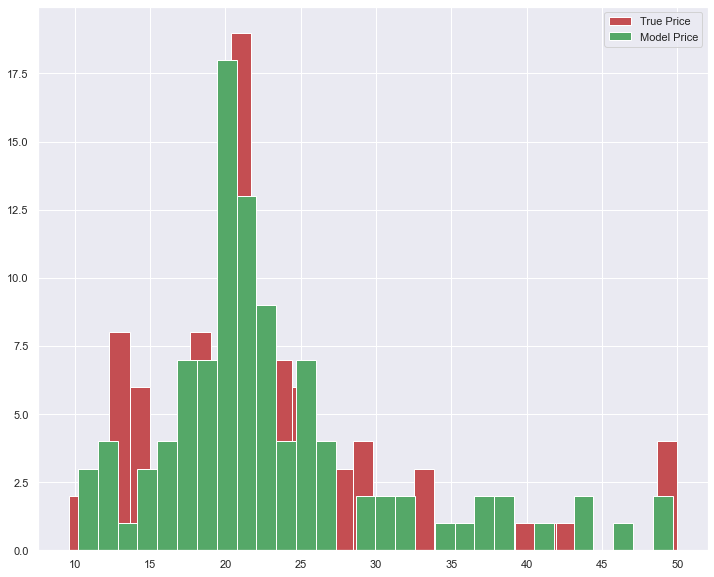

In [125]:
plt.rcParams["figure.figsize"] = (12,10)


plt.hist(y_test, bins=30, color='r', label ='True Price');
plt.hist(pred, bins=30, color='g', label ='Model Price');
plt.legend()